### Step 1: Import data and initial observations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
raw_data = pd.read_json('food_enforcement_US_bacteria.json', orient='records')

In [4]:
print(raw_data.shape)
print(raw_data.head(10).product_description)

(6104, 26)
0    Native Catch Salmon Bacon, Traditional flavor....
1    Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2    Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3    Fresh Fruit Product is labeled in part:  "***F...
4    Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774...
5    River Ranch brand Diced Grn Cabbage w/Color, 4...
6    Sweet and Sour Stir Fry packaged under the fol...
7    Onion Slab Cut.  Products are labeled in part:...
8    MIX w/yellow onions used as an ingredient.  Pr...
9    Fresh n Easy brand Shred Grn Cabbage w/Color, ...
Name: product_description, dtype: object


### Step 2: Bag-of-words feature representation for descriptive text

I included both unigram and bigram for my bag-of-words feature extraction.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 63220)

### Step 3: Fit Kmeans model

In [6]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans

#### First plot inertia scores by number of clusters

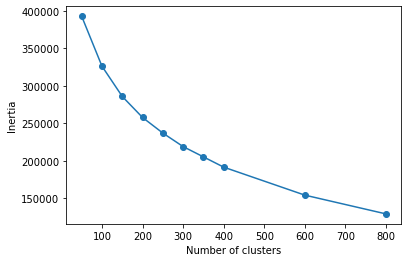

In [8]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []
ranges = [50,100,150,200,250,300,350,400,600,800]

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in ranges:
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(ranges, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Second plot inertia scores based on first plot

In [ ]:
# second attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions2 = []
ranges2 = [200,225,250,275,300,325,350,375,400]
# fit KMeans iteratively to begin to assess the appropriate number of clusters
for j in ranges2:
    km2 = KMeans(n_clusters=j, init='k-means++')
    km2.fit(X)
    distortions2.append(km2.inertia_)
    
# vizualize change in inertia
plt.plot(ranges2, distortions2, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Step 3: Silhouette Analysis

In [ ]:
range_n_clusters = [290,300,310,320]

In [ ]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### labels are named with integers and stored in the `labels_` attribute

In [8]:
km.labels_

array([31, 34, 34, ..., 34,  3, 16], dtype=int32)

### take a look at one of the cluster results

In [9]:
# You should look at all the clusters, but let's look at cluster "15" (I chose this arbitrarily; you should look at all of them)

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 15:
        print(raw_data['product_description'][i])
        print('**********')

Golden delicious whole fresh apples,   Apple Ridge 5lb, 2-3/4  apples, packaged in red net mesh bags  "	3lb, 2-1/2  apples, packaged in poly bags  "	2lb, 2-1/2  apples, packaged in poly bags  "	45ct individual apples on trays with re-useable plastic container boxes  "	50ct, individual apples on trays with re-useable plastic container boxes  "	55ct, individual apples on trays with re-useable plastic container boxes  "	60ct  individual apples on trays with re-useable plastic container boxes  "	78ct individual apples on trays with re-useable plastic container boxes  "	50ct, individual apples on trays in cardboard tray  boxes  "	55ct, individual apples on trays in cardboard tray  boxes      
**********
Fuji, whole fresh apples,   Apple Ridge 5lb, 2-3/4  apples, packaged in red net mesh bags  "	3lb, 2-1/2  apples, packaged in poly bags  "	2lb, 2-1/2  apples, packaged in poly bags  "	45ct individual apples on trays with re-useable plastic container boxes  "	50ct, individual apples on trays w